In [66]:
import pandas as pd
import numpy as np
from itertools import product
from igraph import Graph, plot
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
allData = pd.read_csv("./authors.csv", sep=",", names=["Year","Title","Conf", "Auth"])
print(allData.shape)
allData.sample(5)

(2793928, 4)


,Year,Title,Conf,Auth
719958,2002,The Influence of Software Module Systems on Mo...,SPIN,"Harry C. Li,Kathi Fisler,Shriram Krishnamurthi"
938888,2016,On Representing Interval Measures by Means of ...,MEDI,"Gastón Bakkalian,Christian Koncilia,Robert Wre..."
165822,2006,A Balanced Ensemble Approach to Weighting Clas...,ICDM,"Gabriel Pui Cheong Fung,Jeffrey Xu Yu,Haixun W..."
1456944,1973,Protection and the Control of Information Shar...,SOSP,Jerome H. Saltzer
579390,2014,Gegen den Trend? Neue Software-Teststandards I...,Software Engineering,Matthias Daigl


In [4]:
filter16 = allData.loc[((allData["Conf"]=="ICWSM")|(allData["Conf"]=="CIKM")|(allData["Conf"]=="WWW")|(allData["Conf"]=="IEEE")|(allData["Conf"]=="KDD")) & (allData["Year"]==2016),]
print(filter16.shape)
filter16.sample(5)

(804, 4)


,Year,Title,Conf,Auth
137932,2016,TGraph: A Temporal Graph Data Management System.,CIKM,"Haixing Huang,Jinghe Song,Xuelian Lin,Shuai Ma..."
565132,2016,Modeling a Retweet Network via an Adaptive Bay...,WWW,"Bin Bi,Junghoo Cho"
565673,2016,Latent Space Model for Multi-Modal Social Data.,WWW,"Yoon-Sik Cho,Greg Ver Steeg,Emilio Ferrara,Ara..."
1019812,2016,Robust and Effective Metric Learning Using Cap...,KDD,"Zhouyuan Huo,Feiping Nie 0001,Heng Huang"
561727,2016,The Communication Network Within the Crowd.,WWW,"Ming Yin,Mary L. Gray,Siddharth Suri,Jennifer ..."


In [5]:
filter17 = allData.loc[((allData["Conf"]=="ICWSM")|(allData["Conf"]=="CIKM")|(allData["Conf"]=="WWW")|(allData["Conf"]=="IEEE")|(allData["Conf"]=="KDD")) & (allData["Year"]==2017),]
filter18 = allData.loc[((allData["Conf"]=="ICWSM")|(allData["Conf"]=="CIKM")|(allData["Conf"]=="WWW")|(allData["Conf"]=="IEEE")|(allData["Conf"]=="KDD")) & (allData["Year"]==2018),]
filter19 = allData.loc[((allData["Conf"]=="ICWSM")|(allData["Conf"]=="CIKM")|(allData["Conf"]=="WWW")|(allData["Conf"]=="IEEE")|(allData["Conf"]=="KDD")) & (allData["Year"]==2019),]
filter20 = allData.loc[((allData["Conf"]=="ICWSM")|(allData["Conf"]=="CIKM")|(allData["Conf"]=="WWW")|(allData["Conf"]=="IEEE")|(allData["Conf"]=="KDD")) & (allData["Year"]==2020),]

In [6]:
# Update provided DF based on the received two authors
def checkAndUpdate(auth1, auth2, curDF):
    resp = curDF.loc[((curDF["from"]==auth1)&(curDF["to"]==auth2))]
    if len(resp)==1:
        curDF.loc[((curDF["from"]==auth1)&(curDF["to"]==auth2)),"weight"] = resp["weight"] + 1
    else:
        resp2 = curDF.loc[((curDF["from"]==auth2)&(curDF["to"]==auth1))]
        if len(resp2)==1:
            curDF.loc[((curDF["from"]==auth2)&(curDF["to"]==auth1)), "weight"] = resp2["weight"] + 1
        else:
            curDF = curDF.append({"from":auth1, "to":auth2, "weight":1}, ignore_index=True)
    return curDF

In [7]:
# Create a new DF of author relations from an original DF w/ Authors as comma separated text 
def createComparisonDF(originalDF):
    accum = pd.DataFrame(columns=["from","to","weight"])
    accum.head()
    for index, row in originalDF.iterrows():
        splittedRow = row["Auth"].split(",")
        for i in range(len(splittedRow)):
            for j in range(i+1, len(splittedRow)):
                accum = checkAndUpdate(splittedRow[i], splittedRow[j], accum)
    return accum


In [8]:
filter18["Auth"] = filter18["Auth"].fillna("")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
accum16 = createComparisonDF(filter16)
accum17 = createComparisonDF(filter17)
accum18 = createComparisonDF(filter18)
accum19 = createComparisonDF(filter19)
accum20 = createComparisonDF(filter20)

In [ ]:
accum16.to_csv("./authorsRelations2016.csv", index = False)
accum17.to_csv("./authorsRelations2017.csv", index = False)
accum18.to_csv("./authorsRelations2018.csv", index = False)
accum19.to_csv("./authorsRelations2019.csv", index = False)
accum20.to_csv("./authorsRelations2020.csv", index = False)

All files are uploaded (and will stay in that form without updating) on Google Drive, you can view them by following [the link to the open shared folder](https://drive.google.com/drive/folders/1fwScWFEhKSUlIB3HGF5nv8Bm1hi1qslF?usp=sharing)

In [20]:
# To continue from this point fetch the data
# accum16 = pd.read_csv("./authorsRelations2016.csv")
# accum17 = pd.read_csv("./authorsRelations2017.csv")
# accum18 = pd.read_csv("./authorsRelations2018.csv")
# accum19 = pd.read_csv("./authorsRelations2019.csv")
# accum20 = pd.read_csv("./authorsRelations2020.csv")


### Create the 5 graphs

In [21]:
accum16.loc[(accum16["from"] == "Lexing Xie") | (accum16["to"] == "Lexing Xie")].head(10)

,from,to,weight
52,Dongwoo Kim 0002,Lexing Xie,1
54,Lexing Xie,Cheng Soon Ong,2
1749,Swapnil Mishra,Lexing Xie,1
1750,Marian-Andrei Rizoiu,Lexing Xie,1
2015,Dawei Chen,Lexing Xie,1


In [22]:
accum16.loc[accum16["weight"]>1].head(5)

,from,to,weight
15,John Foley,James Allan,2
24,Huayu Wu 0001,Stéphane Bressan,2
54,Lexing Xie,Cheng Soon Ong,2
64,Md. Saiful Islam 0003,Chengfei Liu,2
66,Md. Saiful Islam 0003,Tarique Anwar,2


In [23]:
graph16 = Graph.TupleList(accum16.itertuples(index=False), directed=False, edge_attrs="weight")
graph17 = Graph.TupleList(accum17.itertuples(index=False), directed=False, edge_attrs="weight")
graph18 = Graph.TupleList(accum18.itertuples(index=False), directed=False, edge_attrs="weight")
graph19 = Graph.TupleList(accum19.itertuples(index=False), directed=False, edge_attrs="weight")
graph20 = Graph.TupleList(accum20.itertuples(index=False), directed=False, edge_attrs="weight")

### Plotting metrics over time
#### vertices, edges, diameter, avg degree

In [24]:
[sum(graph16.degree())/graph16.vcount(),sum(graph17.degree())/graph17.vcount(),sum(graph18.degree())/graph18.vcount(),sum(graph19.degree())/graph19.vcount(),sum(graph20.degree())/graph20.vcount()]

[4.465489566613162,
 4.587821189721929,
 4.867330549309348,
 5.619069876139285,
 5.706005879882403]

In [25]:
overYearDF = pd.DataFrame({"year":[2016,2017,2018,2019,2020], "verticeCount": [graph16.vcount(),graph17.vcount(),graph18.vcount(),graph19.vcount(),graph20.vcount()], "edgeCount": [graph16.ecount(),graph17.ecount(),graph18.ecount(),graph19.ecount(),graph20.ecount()], "diameter": [graph16.diameter(),graph17.diameter(),graph18.diameter(),graph19.diameter(),graph20.diameter()], "avgDegree":[sum(graph16.degree())/graph16.vcount(),sum(graph17.degree())/graph17.vcount(),sum(graph18.degree())/graph18.vcount(),sum(graph19.degree())/graph19.vcount(),sum(graph20.degree())/graph20.vcount()]})

overYearDF.head(5)

,year,verticeCount,edgeCount,diameter,avgDegree
0,2016,2492,5564,19,4.465490
1,2017,2841,6517,13,4.587821
2,2018,3113,7576,19,4.867331
3,2019,4279,12022,16,5.619070
4,2020,4762,13586,20,5.706006


Text(0.5, 1.0, 'Avg Degree per Year')

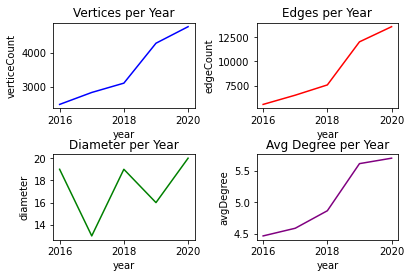

In [26]:
fig, axs = plt.subplots(ncols=2, nrows=2)
plt.tight_layout(pad=2.5)
sn.lineplot(x='year', y='verticeCount', data=overYearDF, ax=axs[0][0], color="blue").set_title("Vertices per Year")
sn.lineplot(x='year', y='edgeCount', data=overYearDF, ax=axs[0][1], color="red").set_title("Edges per Year")
sn.lineplot(x='year', y='diameter', data=overYearDF, ax=axs[1][0], color="green").set_title("Diameter per Year")
sn.lineplot(x='year', y='avgDegree', data=overYearDF, ax=axs[1][1], color="purple").set_title("Avg Degree per Year")

There is a noticable rising trend of all metrics. This makes sense, since authors become more popular over the years. With experience, results get faster, and more projects/papers are published

### Important nodes<br><br>
A question here would be how do we define the "top 10" is it top 10 over these 5 years, is it the top 10 each year, or the top 10 of the first year and we track their progress? <br>
There should be different logic, depending on the above decision. <br> 
Depending on the choice we would: <br>
- Combine the DFs to pick tops<br>
- Create 5 DFs out of the originals with information on the tops<br>
- Find the first year's top 10, and filter their data from other graphs<br><br><br>
For this example, I will opt for the third choice

In [27]:
# Top 10 degrees
degrees = graph16.degree()
degrees.sort(reverse=True)
print(degrees[0:10])
ranks = graph16.pagerank()
ranks.sort(reverse=True)
print(ranks[0:10])

[41, 37, 32, 29, 29, 27, 25, 24, 23, 23]
[0.0022757780415804856, 0.0021017470655200227, 0.0016955739360523853, 0.0016120074356073017, 0.0015640877685833166, 0.001555647850342737, 0.0014162042722786748, 0.001188359329084295, 0.0011499879528987858, 0.0011464356334935023]


In [28]:
# Find vertices with degree >= 23
top10Degrees = graph16.vs.select(_degree_ge=23)["name"]
top10Ranks = graph16.vs.select(_pagerank_ge=0.0011464356334935023)["name"]
print(top10Degrees)
print(top10Ranks)

['Hanghang Tong', 'Naren Ramakrishnan', 'Hui Xiong 0001', 'Jiliang Tang', 'Philip S. Yu', 'Christos Faloutsos', 'Jiawei Han 0001', 'Yi Chang 0001', 'Jieping Ye', 'Rayid Ghani']
['Hanghang Tong', 'Maarten de Rijke', 'Hui Xiong 0001', 'Huan Liu 0001', 'Philip S. Yu', 'Christos Faloutsos', 'Jiawei Han 0001', 'Yi Chang 0001', 'Jure Leskovec', 'Jieping Ye']


In [29]:
topOverYear = pd.DataFrame(columns=["name", "degree", "year"])
topOverYearRank = pd.DataFrame(columns=["name", "pagerank", "year"])

In [30]:
def getDegreeOrRank(graph, name, degreeOrRank=1):
    try:
        graph.vs.find(name=name)
    except:
        return 0
    if degreeOrRank==1:
        return graph.vs.find(name=name).degree()
    else:
        return graph.vs.find(name=name).pagerank()
    

In [31]:
# For degree
for person in top10Degrees:
    topOverYear = topOverYear.append({"name":person, "degree":getDegreeOrRank(graph16,person,1), "year":2016}, ignore_index=True)
    topOverYear = topOverYear.append({"name":person, "degree":getDegreeOrRank(graph17,person,1), "year":2017}, ignore_index=True)
    topOverYear = topOverYear.append({"name":person, "degree":getDegreeOrRank(graph18,person,1), "year":2018}, ignore_index=True)
    topOverYear = topOverYear.append({"name":person, "degree":getDegreeOrRank(graph19,person,1), "year":2019}, ignore_index=True)
    topOverYear = topOverYear.append({"name":person, "degree":getDegreeOrRank(graph20,person,1), "year":2020}, ignore_index=True)
print(topOverYear.sample(5))

                  name degree  year
35       Yi Chang 0001     27  2016
22        Philip S. Yu     47  2018
2        Hanghang Tong     11  2018
6   Naren Ramakrishnan     15  2017
10      Hui Xiong 0001     37  2016


In [32]:
# For ranks
for person in top10Ranks:
    topOverYearRank = topOverYearRank.append({"name":person, "pagerank":getDegreeOrRank(graph16,person,2), "year":2016}, ignore_index=True)
    topOverYearRank = topOverYearRank.append({"name":person, "pagerank":getDegreeOrRank(graph17,person,2), "year":2017}, ignore_index=True)
    topOverYearRank = topOverYearRank.append({"name":person, "pagerank":getDegreeOrRank(graph18,person,2), "year":2018}, ignore_index=True)
    topOverYearRank = topOverYearRank.append({"name":person, "pagerank":getDegreeOrRank(graph19,person,2), "year":2019}, ignore_index=True)
    topOverYearRank = topOverYearRank.append({"name":person, "pagerank":getDegreeOrRank(graph20,person,2), "year":2020}, ignore_index=True)
print(topOverYearRank.sample(5))

                name  pagerank  year
39     Yi Chang 0001  0.000000  2020
10    Hui Xiong 0001  0.002102  2016
36     Yi Chang 0001  0.001193  2017
9   Maarten de Rijke  0.000452  2020
47        Jieping Ye  0.000821  2018


In [33]:
topOverYear["year"] = topOverYear["year"].astype("float")
topOverYear["degree"] = topOverYear["degree"].astype("float")
topOverYearRank["year"] = topOverYearRank["year"].astype("float")
topOverYearRank["pagerank"] = topOverYearRank["pagerank"].astype("float")

Text(0.5, 1.0, 'PageRank position over Year')

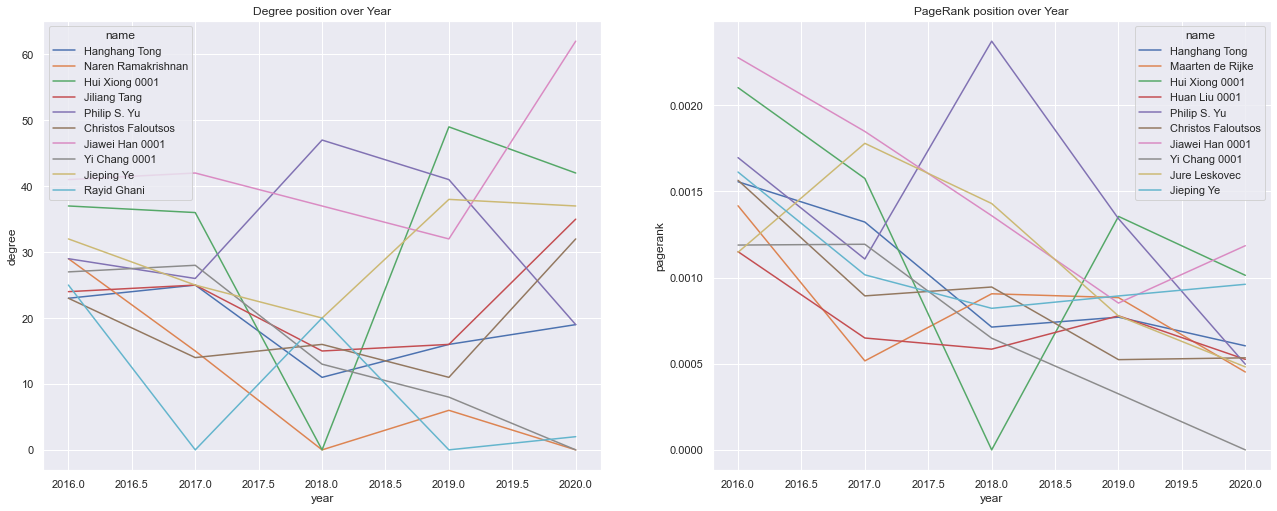

In [34]:
sn.set(rc={'figure.figsize':(22,8.27)})
fig, axs = plt.subplots(ncols=2)
sn.lineplot(x='year', y='degree', data=topOverYear, hue='name',ax=axs[0]).set_title("Degree position over Year")
sn.lineplot(x='year', y='pagerank', data=topOverYearRank, hue='name',ax=axs[1]).set_title("PageRank position over Year")

We can again see here how some of the authors do not have publications in the selected conferences. Others though, such as Jiawei Han, seem to frequently appear in these same conferences. Although we do not have geo and location information, perhaps we can assume (by name) that Asian people are more frequently appearing in these conferences as well.

### Community detection
Fast greedy, InfoMap & Luvain clustering <br>
- Graph.community_fastgreedy() -> Fast greedy
- Graph.community_infomap() -> Infomap
- Graph.community_multilevel() -> Luvain <br><br>
https://igraph.org/python/doc/api/igraph._igraph.GraphBase.html#community_fastgreedy<br><br><br>

An interesting discussion -> https://stackoverflow.com/questions/17413836/igraph-in-python-relation-between-a-vertexdendrogram-object-and-vertexclusterin

In [35]:
clustersFast16= graph16.community_fastgreedy().as_clustering()
clustersFast17= graph17.community_fastgreedy().as_clustering()
clustersFast18= graph18.community_fastgreedy().as_clustering()
clustersFast19= graph19.community_fastgreedy().as_clustering()
clustersFast20= graph20.community_fastgreedy().as_clustering()

In [36]:
clustersInfo16= graph16.community_infomap()
clustersInfo17= graph17.community_infomap()
clustersInfo18= graph18.community_infomap()
clustersInfo19= graph19.community_infomap()
clustersInfo20= graph20.community_infomap()
print(clustersInfo16[0])

[0, 1, 2, 3, 4, 311, 312]


In [37]:
clustersMulti16= graph16.community_multilevel()
clustersMulti17= graph17.community_multilevel()
clustersMulti18= graph18.community_multilevel()
clustersMulti19= graph19.community_multilevel()
clustersMulti20= graph20.community_multilevel()

In [38]:
print(clustersFast16[0])
print(clustersInfo16[0])
print(clustersMulti16[0])

[0, 1, 2, 3, 4, 311, 312]
[0, 1, 2, 3, 4, 311, 312]
[0, 1, 2, 3, 4, 311, 312]


Performance wise, there was a noticeble latency (2x-3x) of InfoMap compared to the rest.

In [39]:
selectedName = "Jiawei Han 0001"
# clustersMulti16[54] -> This is the community he belongs in

In [40]:
# Selecting Person
index16 = graph16.vs.find(name=selectedName).index
index17 = graph17.vs.find(name=selectedName).index
index18 = graph18.vs.find(name=selectedName).index
index19 = graph19.vs.find(name=selectedName).index
index20 = graph20.vs.find(name=selectedName).index
indexes = [index16,index17,index18,index19,index20]
print(indexes)

[726, 32, 691, 494, 2291]


In [41]:
def findInCommunity(communities, personIndex):
    return communities.membership[personIndex]

In [42]:
# Looks like we can verify our function fetches the person correctly
print(findInCommunity(clustersMulti16, 726))

127


In [43]:
communityOverYear = [findInCommunity(clustersMulti16, indexes[0]),findInCommunity(clustersMulti17, indexes[1]),findInCommunity(clustersMulti18, indexes[2]),findInCommunity(clustersMulti19, indexes[3]),findInCommunity(clustersMulti20, indexes[4])]
print(communityOverYear)

[127, 6, 94, 22, 27]


Similarities? Graphs?

[](http://www.cs.rhul.ac.uk/home/tamas/development/igraph/tutorial/tutorial.html)

In [83]:
clustersMulti16[0]

[0, 1, 2, 3, 4, 311, 312]

In [113]:
def filterCommunities(communities, minSize = 10, maxSize = 30):
    comSize = communities.sizes()
    filteredComs = []
    for i, size in enumerate(comSize):
        if (size > minSize) & (size < maxSize):
           filteredComs = filteredComs + communities[i]
    return filteredComs


In [114]:
filtered16 = filterCommunities(clustersMulti16)
print(len(filtered16))
subsetGraph = graph16.subgraph(graph16.vs.select(filtered16))
subsetMulti = subsetGraph.community_multilevel()

424


In [118]:
layout = subsetGraph.layout(layout='auto')

plot(subsetMulti, mark_groups=True, inline=False, vertex_label = None, layout=layout)

<img src="../communities2016filt.png">

If you can't load the image, you can find it [by following this link](https://drive.google.com/file/d/1L49cbLy_tZz92UTZ5zzVwkto49w-Edxh/view).